<a href="https://colab.research.google.com/github/JodhiKrisantus/Machine-Learning/blob/main/Project_Akhir_Jodhi_Krisantus_KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


#PERSIAPAN DATA

In [ ]:
df=pd.read_csv('Data_Negara_HELP.csv')
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
df.shape#Memastikan berapa baris berapa kolom

(167, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
df.isnull().any()#Check Missing Value

Negara              False
Kematian_anak       False
Ekspor              False
Kesehatan           False
Impor               False
Pendapatan          False
Inflasi             False
Harapan_hidup       False
Jumlah_fertiliti    False
GDPperkapita        False
dtype: bool

In [ ]:
#Mengecek lagi apakah ada Mising Value atau tidak. Ternyata tidak, karena masih 167 row, 10 col. Artinya tidak ada yang di drop
df=df.dropna(how='all')
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


#EDA

#UNIVARIATE ANALISIS
merupakan sebuah teknik dalam memahami dan melakukan eksplorasi data. Imbuhan awal ‘Uni’ artinya ‘satu’, maka analisa univariate merupakan analisa data feature tunggal.

1. Dari data Kematian Anak. Jumlah Angka kematian paling banyak dijumpai pada rentan nilai 0 sampai 50
2. Pada data Ekspor. Jumlah Ekspor paling tinggi, berada pada nilai 25, dengan jumlah 40 Negara.
3. Pada data Kesehatan. Jumlah Angka kesehatan paling banyak pada rentan nilai 4 - 6, sedangkan jumlahnya yaitu 35 Negara
4. Dari data Impor. Jumlah Angka impor terbanyak yaitu pada nilai 25. Dengan jumlah negara yang melakukan Impor pada nilai 25 tersebut yaitu 30 Negara
5. Dari data Pendapatan. Jumlah Pendapatan terbanyak berada pada rentan nilai 0 - 20000.
6. Dari data Inflasi. Jumlah Inflasi terbanyak berada pada rentan nilai 0 - 20
7. Dari data Pendapatan. Jumlah Pendapatan terbanyak berada pada rentan nilai 0 - 20000.
8. Dari data Harapan Hidup. Jumlah Harapan Hidup terbanyak berada pada rentan nilai 70 - 80
9. Dari data 'Jumlah Fertiliti'. Jumlah data 'Jumlah Fertiliti' terbanyak berada pada rentan nilai 1-3
10. Dari data 'Jumlah Fertiliti'. Jumlah data 'Jumlah Fertiliti' terbanyak berada pada rentan nilai 1-3.
11. Dari Data GDP per Capita. paling banyak pada rentan nilai 0 - 20000


<Figure size 864x576 with 0 Axes>

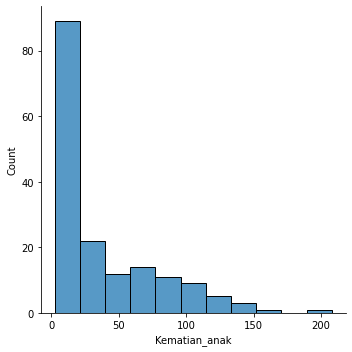

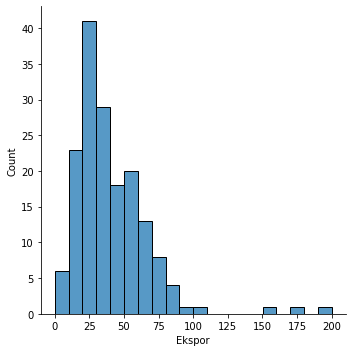

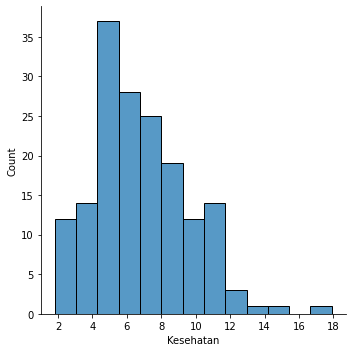

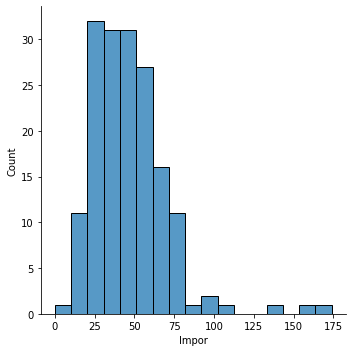

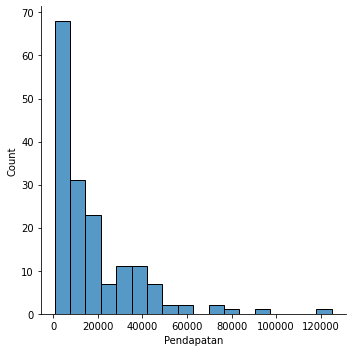

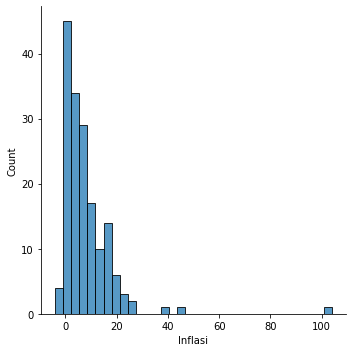

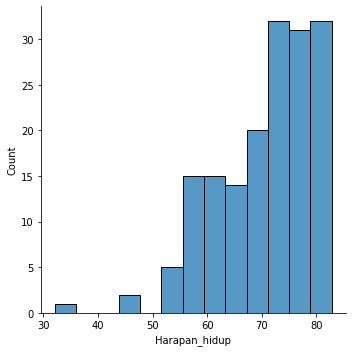

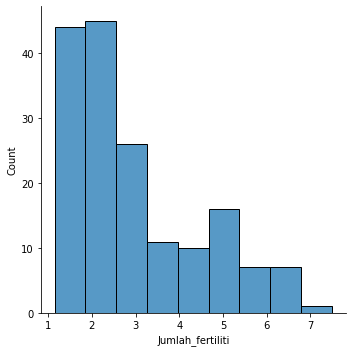

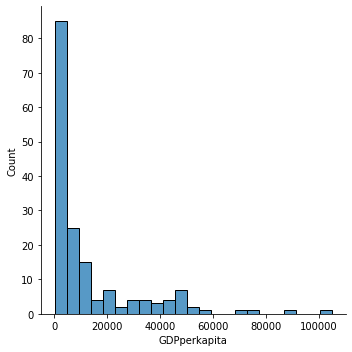

In [ ]:
#UNIVARIATE ANALISIS

fig=plt.figure(figsize=(12,8))
for i in enumerate(df.describe().columns):
  sns.displot(df[i[1]])
plt.show()
fig.savefig('univariate.png')

#Bivariate
 Bivariate analysis digunakan untuk untuk menganalisa 2 variables dan menemukan sebuah relasi. Analisis bivariate juga merupakan salah satu cara untuk menggunakan koefisien korelasi dalam rangka menemukan apakah dua variabel memiliki relasi atau tidak.

In [ ]:
#untuk melihat hubungan antara kematian anak dan harapan hidup
kematian_Harapan=df.drop(columns=['Ekspor',	'Kesehatan',	'Impor',	'Pendapatan',	'Inflasi','Jumlah_fertiliti',	'GDPperkapita'])
kematian_Harapan=kematian_Harapan.sort_values('Kematian_anak',ascending=False)#Sorting berdasarkan Kematian Anak
kematian_Harapan.head()

,Negara,Kematian_anak,Harapan_hidup
66,Haiti,208.0,32.1
132,Sierra Leone,160.0,55.0
32,Chad,150.0,56.5
31,Central African Republic,149.0,47.5
97,Mali,137.0,59.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


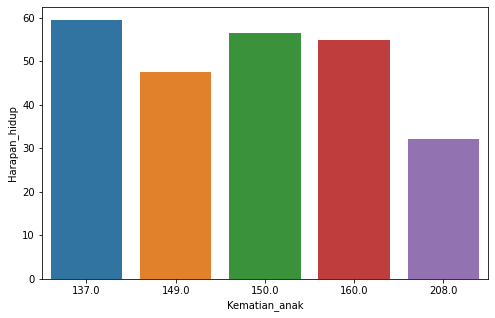

In [ ]:
fig=plt.figure(figsize=(8,5))
sns.barplot(kematian_Harapan['Kematian_anak'].head(), kematian_Harapan['Harapan_hidup'].head())
fig.savefig('BarPlot.png')

Dari BARPLOT Kematian_anak & Harapan_hidup. Diperoleh Harapan Hidup dan Kematian Anak berbanding terbalik. Dimana Semakin Tinggi nilai Harapan Hidup, Maka kematian Anak Semakin Rendah. Pada barplot ditunjukkan bahwa pada Harapan_Hidup bernilai 60, maka tingkat Kematian_Anak bernilai 137. Ketika Harapan Hidup 30, maka jumlah Kematian Anak makin tinggi yaitu 208

In [ ]:
#MELIHAT Hubungan Pendapatan dan GDPPerkapita
pendapatan_gdp=df.drop(columns=['Kematian_anak','Ekspor','Kesehatan','Impor','Inflasi',	'Harapan_hidup',	'Jumlah_fertiliti'])
pendapatan_gdp=pendapatan_gdp.sort_values('Pendapatan',ascending=True)
pendapatan_gdp.head()

,Negara,Pendapatan,GDPperkapita
37,"Congo, Dem. Rep.",609,334
88,Liberia,700,327
26,Burundi,764,231
112,Niger,814,348
31,Central African Republic,888,446


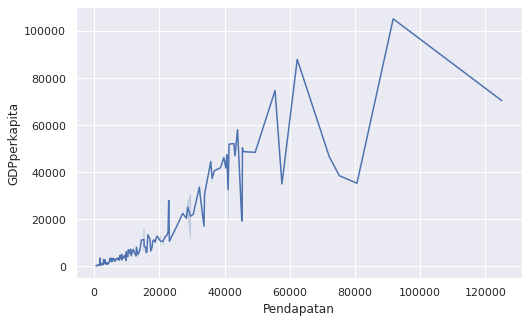

In [ ]:
fig=plt.figure(figsize=(8,5))
sns.set_theme(style="darkgrid")
sns.lineplot(data=pendapatan_gdp, x="Pendapatan", y="GDPperkapita")
fig.savefig('LinePlot.png')

DARI LINEPLOT Pendapatan Vs GDP Perkapita, diperoleh bahwa. Relasi antara Pendapatan dan GDPPerkapita yaitu berbanding lurus. Dimana Semakin Tinggi pendapatan, Maka GDP Semakin Rendah. Artinya Hubungan Korelasi Diantara Keduanya yaitu Tinggi

MULTIVARIATE

Multivariate analysis digunakan untuk menganalisa lebih dari 2 variabel di waktu yang sama, trends yang dihasilkan bisa menjadi multidimensi secara alami, dengan analisa ini akan membantu kita memahami manakah data yang memiliki tren yang kompleks pada kombinasi atribut.

PADA GAMBAR HEATMAP :

pada Heatmap didapatkan bahwa warna yang paling terang Vanila = (1), akan memiliki koefisien korelasi tertinggi. Dan warna berwarna gelap black>=(-0,75) Memiliki Koefisien Korelasi Terendah. 


1. Antara Pendapatan & GDP Perkapita Memiliki Koefisien Korelasi Tertinggi (0,9)
2. Kematian Anak dan Jumlah Fertiliti memiliki koefisien korelasi tinggi yaitu (0,85)
2. Harapan Hidup & Kematian Anak Memiliki Koefisien Korelasi TerRendah (-0.89)

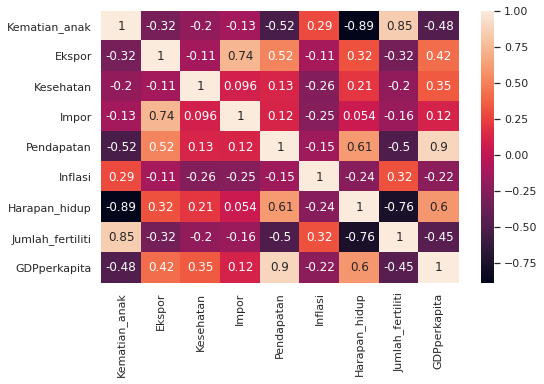

In [ ]:
fig=plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True, fmt='.2g')
fig.savefig('HeatMap.png')

#DROP DATA

Kita akan mengambil salah satu data yang Hubungan korelasinya. Dengan tetap menyertakan data yang Hubungan korelasinya rendah. Pada kasus ini data yang kita ambil yaitu :
1. Pendapatan: Penghasilan bersih perorang
3. Harapan Hidup : Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama



##Outlier Treatment
cek outlier dengan boxplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


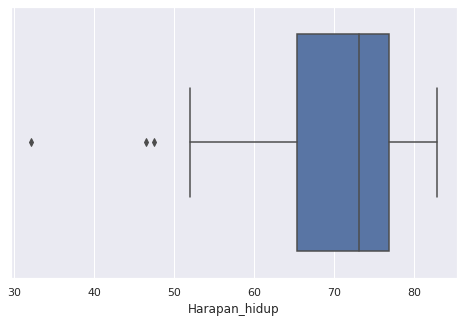

In [ ]:
fig=plt.figure(figsize=(8,5))
sns.boxplot('Harapan_hidup', data=df)
fig.savefig('Boxplot_HARAPAN_HIDUP.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


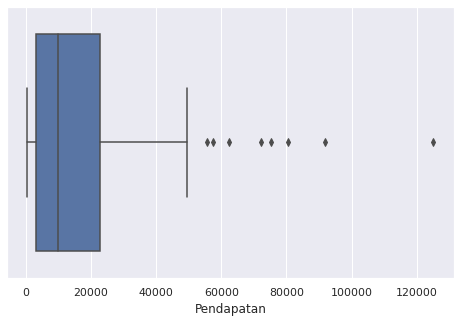

In [ ]:
fig=plt.figure(figsize=(8,5))
sns.boxplot('Pendapatan', data=df)
fig.savefig('Boxplot_PENDAPATAN.png')

In [ ]:
def remove_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR  = Q3-Q1
  df_final = df[~(df>(Q1-(1.5*IQR))) | (df<(Q3+(1.5*IQR)))]
  return df_final

In [ ]:
df2 = remove_outlier(df[['Pendapatan','Harapan_hidup']])#COBA 3 data, menambahkan
df2.dropna(axis=0, inplace=True)
df2

,Pendapatan,Harapan_hidup
0,1610.0,56.2
1,9930.0,76.3
2,12900.0,76.5
3,5900.0,60.1
4,19100.0,76.8
...,...,...
162,2950.0,63.0
163,16500.0,75.4
164,4490.0,73.1
165,4480.0,67.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


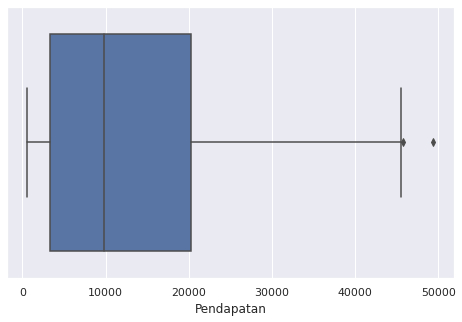

In [ ]:
fig=plt.figure(figsize=(8,5))
sns.boxplot('Pendapatan', data=df2)
fig.savefig('REMOVEOUTLIER_PENDAPATAN.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


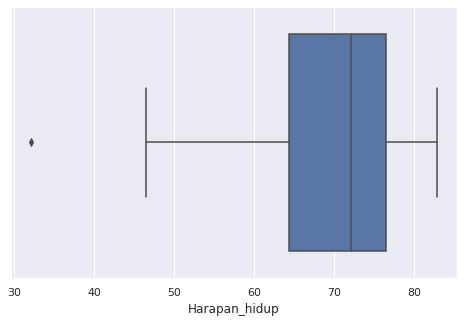

In [ ]:
fig=plt.figure(figsize=(8,5))
sns.boxplot('Harapan_hidup', data=df2)
fig.savefig('REMOVEOUTLIER_HARAPANHidup.png')

#SCALING DATA

In [ ]:
#feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_std = sc.fit_transform(df2)

In [ ]:
#clustering with KMeans
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters = 2, random_state=42).fit(df_std)
labels1 = kmeans1.labels_
labels1

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1], dtype=int32)

In [ ]:
new_df = pd.DataFrame(data=df_std, columns=['Pendapatan','Harapan_hidup'])
new_df['label1_kmeans'] = labels1
new_df

,Pendapatan,Harapan_hidup,label1_kmeans
0,-0.950815,-1.574758,1
1,-0.317848,0.704060,0
2,-0.091898,0.726735,0
3,-0.624441,-1.132600,1
4,0.379784,0.760747,0
...,...,...,...
154,-0.848871,-0.803815,1
155,0.181982,0.602023,0
156,-0.731711,0.341263,1
157,-0.732472,-0.293632,1


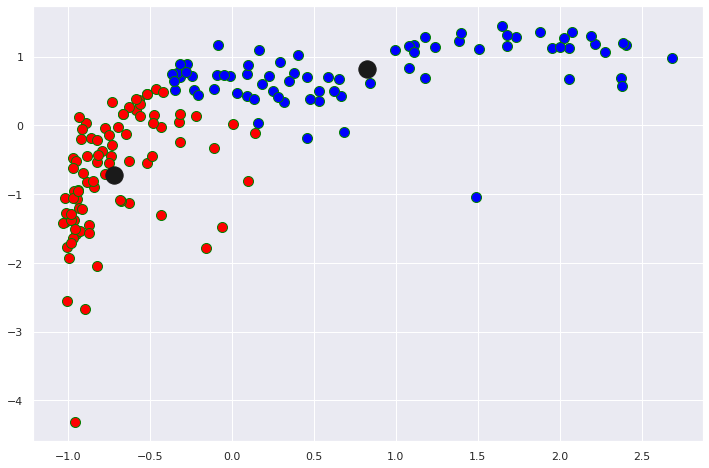

In [ ]:
fig=plt.figure(figsize=(12,8))

plt.scatter(new_df['Pendapatan'][new_df.label1_kmeans==0], new_df['Harapan_hidup'][new_df.label1_kmeans==0], c='blue', s=100, edgecolors='green')
plt.scatter(new_df['Pendapatan'][new_df.label1_kmeans==1], new_df['Harapan_hidup'][new_df.label1_kmeans==1], c='red', s=100, edgecolors='green')


plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,0], c='k', s=300)

plt.show()
fig.savefig('Kmeans_1.1.png')

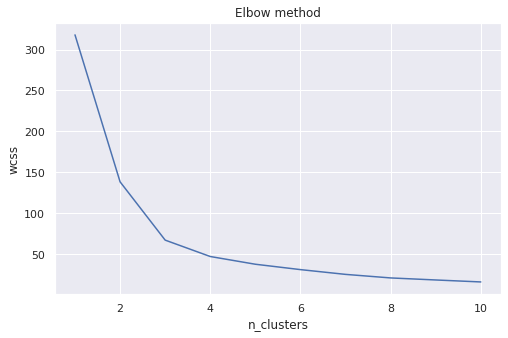

In [ ]:
fig=plt.figure(figsize=(8,5))
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('n_clusters')
plt.ylabel('wcss')

plt.show()
fig.savefig('ELBOW METHOD.png')

In [ ]:
kmeans2 = KMeans(n_clusters = 4, init='k-means++', random_state=42)
kmeans2.fit(df_std)
labels2 = kmeans2.labels_

In [ ]:
new_df['label2_kmeans'] = labels2
new_df

,Pendapatan,Harapan_hidup,label1_kmeans,label2_kmeans
0,-0.950815,-1.574758,1,1
1,-0.317848,0.704060,0,3
2,-0.091898,0.726735,0,3
3,-0.624441,-1.132600,1,1
4,0.379784,0.760747,0,3
...,...,...,...,...
154,-0.848871,-0.803815,1,1
155,0.181982,0.602023,0,3
156,-0.731711,0.341263,1,2
157,-0.732472,-0.293632,1,2


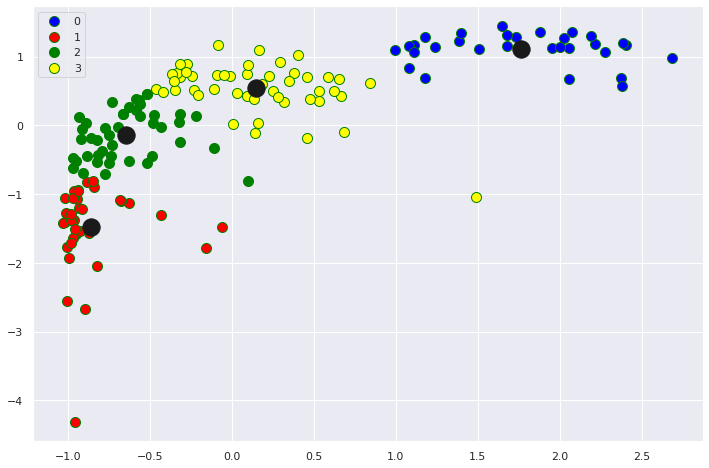

In [ ]:
fig=plt.figure(figsize=(12,8))

plt.scatter(new_df['Pendapatan'][new_df.label2_kmeans==0], new_df['Harapan_hidup'][new_df.label2_kmeans==0], label='0', c='blue', s=100, edgecolors='green')
plt.scatter(new_df['Pendapatan'][new_df.label2_kmeans==1], new_df['Harapan_hidup'][new_df.label2_kmeans==1], label='1', c='red', s=100, edgecolors='green')
plt.scatter(new_df['Pendapatan'][new_df.label2_kmeans==2], new_df['Harapan_hidup'][new_df.label2_kmeans==2], label='2', c='green', s=100, edgecolors='green')
plt.scatter(new_df['Pendapatan'][new_df.label2_kmeans==3], new_df['Harapan_hidup'][new_df.label2_kmeans==3], label ='3', c='yellow', s=100, edgecolors='green')

plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
plt.legend()
plt.show()
fig.savefig('Kmeans_1.2.png')

In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df_std, labels= labels1))
print(silhouette_score(df_std, labels= labels2))

0.4793984682060574
0.476476701030405


#INVERSE TRANSFORM

In [ ]:
from sklearn.cluster import KMeans
kmeansa = KMeans(n_clusters = 2, random_state=42).fit(sc.inverse_transform(df_std))
labelsa = kmeansa.labels_
labelsa

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1], dtype=int32)

In [ ]:
kmeansb = KMeans(n_clusters = 4, init='k-means++', random_state=42).fit(df_std)
labelsb = kmeansb.labels_
labelsb

array([1, 3, 3, 1, 3, 3, 2, 0, 0, 3, 3, 0, 2, 3, 3, 0, 2, 1, 2, 2, 3, 1,
       3, 3, 1, 1, 2, 1, 0, 2, 1, 1, 3, 3, 3, 2, 1, 1, 3, 1, 3, 0, 0, 0,
       3, 3, 2, 2, 3, 1, 3, 2, 0, 0, 2, 2, 2, 0, 1, 0, 2, 2, 1, 1, 2, 1,
       3, 0, 2, 2, 3, 2, 0, 0, 0, 3, 0, 3, 3, 1, 1, 2, 2, 3, 3, 1, 1, 0,
       3, 3, 1, 1, 3, 3, 1, 0, 2, 3, 2, 2, 2, 3, 2, 1, 2, 1, 2, 0, 0, 1,
       1, 0, 2, 3, 2, 3, 2, 3, 0, 3, 3, 2, 2, 0, 2, 3, 3, 1, 3, 0, 1, 1,
       0, 0, 3, 2, 2, 3, 0, 2, 1, 3, 2, 1, 2, 3, 3, 2, 1, 2, 0, 0, 3, 2,
       1, 3, 2, 2, 1], dtype=int32)

In [ ]:
new_df1 = pd.DataFrame(data=sc.inverse_transform(df_std), columns=['Pendapatan','Harapan_hidup'])
new_df1['label1_kmeans'] = labelsa
new_df1['label2_kmeans'] = labelsb
new_df1

,Pendapatan,Harapan_hidup,label1_kmeans,label2_kmeans
0,1610.0,56.2,1,1
1,9930.0,76.3,1,3
2,12900.0,76.5,1,3
3,5900.0,60.1,1,1
4,19100.0,76.8,1,3
...,...,...,...,...
154,2950.0,63.0,1,1
155,16500.0,75.4,1,3
156,4490.0,73.1,1,2
157,4480.0,67.5,1,2


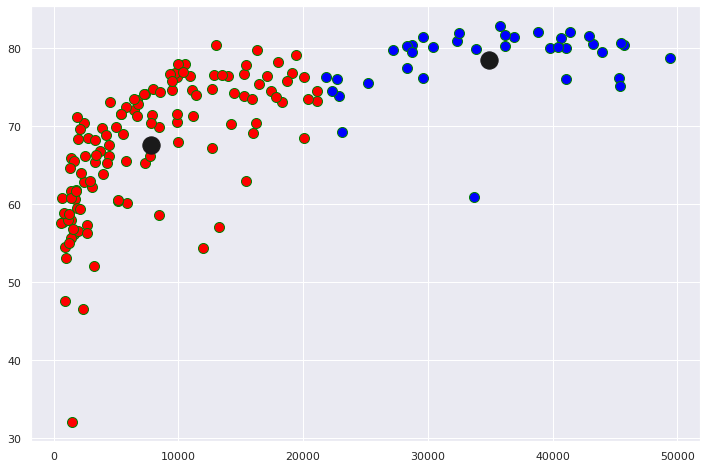

In [ ]:
fig=plt.figure(figsize=(12,8))

plt.scatter(new_df1['Pendapatan'][new_df1.label1_kmeans == 0], new_df1['Harapan_hidup'][new_df1.label1_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(new_df1['Pendapatan'][new_df1.label1_kmeans == 1], new_df1['Harapan_hidup'][new_df1.label1_kmeans == 1], c='red', s=100, edgecolor='green')

plt.scatter(kmeansa.cluster_centers_[:, 0],kmeansa.cluster_centers_[:, 1], c='k', s=300 )

plt.show()
fig.savefig('Kmeans_Inverse_1.1.png')

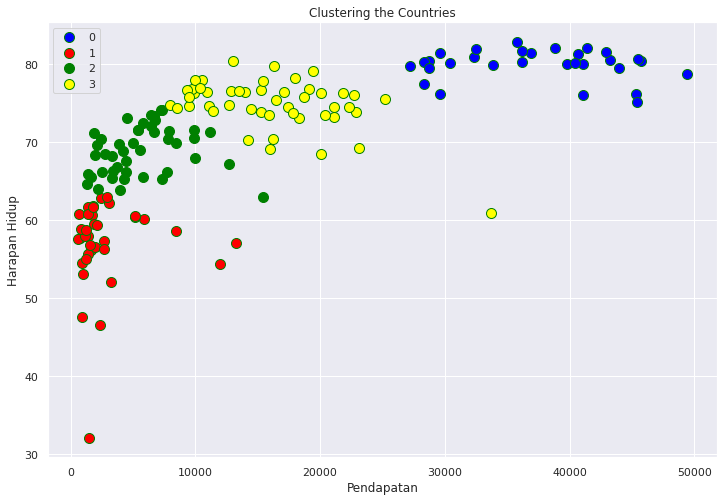

In [ ]:
fig=plt.figure(figsize=(12,8))

plt.scatter(new_df1['Pendapatan'][new_df1.label2_kmeans == 0], new_df1['Harapan_hidup'][new_df1.label2_kmeans == 0], c='blue', label='0', s=100, edgecolor='green')
plt.scatter(new_df1['Pendapatan'][new_df1.label2_kmeans == 1], new_df1['Harapan_hidup'][new_df1.label2_kmeans == 1], c='red', label='1', s=100, edgecolor='green')
plt.scatter(new_df1['Pendapatan'][new_df1.label2_kmeans == 2], new_df1['Harapan_hidup'][new_df1.label2_kmeans == 2], c='green',label = '2', s=100, edgecolor='green')
plt.scatter(new_df1['Pendapatan'][new_df1.label2_kmeans == 3], new_df1['Harapan_hidup'][new_df1.label2_kmeans == 3], c='yellow', label = '3', s=100, edgecolor='green')

# plt.scatter(kmeansb.cluster_centers_[:, 0],kmeansb.cluster_centers_[:, 1], c='k', s=300 )
plt.legend()
plt.title('Clustering the Countries')
plt.xlabel('Pendapatan')
plt.ylabel('Harapan Hidup')
plt.show()
fig.savefig('Kmeans_Inverse_1.2.png')

Sumarry

In [ ]:
df['K_means_labels'] = pd.Series(labelsb).astype('object')
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,K_means_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,NaN
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,NaN
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,NaN
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,NaN


In [ ]:
top_Bantuan = df[df['K_means_labels']==1]
top_Bantuan

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,K_means_labels
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,1
24,Bulgaria,10.8,50.20,6.87,53.0,15300,1.110,73.9,1.57,6840,1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1
27,Cambodia,44.4,54.10,5.68,59.5,2520,3.120,66.1,2.88,786,1
30,Cape Verde,26.5,32.70,4.09,61.8,5830,0.505,72.5,2.67,3310,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,1


In [ ]:
top_Bantuan.sort_values(by=['Pendapatan'],ascending=True)[:10]

,index,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,K_means_labels
0,37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,1
1,31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1
2,94,Malawi,90.5,22.80,6.59,34.9,1030,12.100,53.1,5.31,459,1
3,63,Guinea,109.0,30.30,4.93,43.2,1190,16.100,58.0,5.34,648,1
4,36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,1
5,25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1
6,0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1
7,17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1
8,109,Nepal,47.0,9.58,5.25,36.4,1990,15.100,68.3,2.61,592,1
9,80,Kenya,62.2,20.70,4.75,33.6,2480,2.090,62.8,4.37,967,1
